In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import units as u
import numpy as np
from astropy.nddata import CCDData
from matplotlib.colors import LogNorm
from astropy.table import QTable
import ccdproc
import photutils
from photutils import aperture_photometry, CircularAperture
from photutils import CircularAnnulus
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import psf
from astropy.modeling import models, fitting

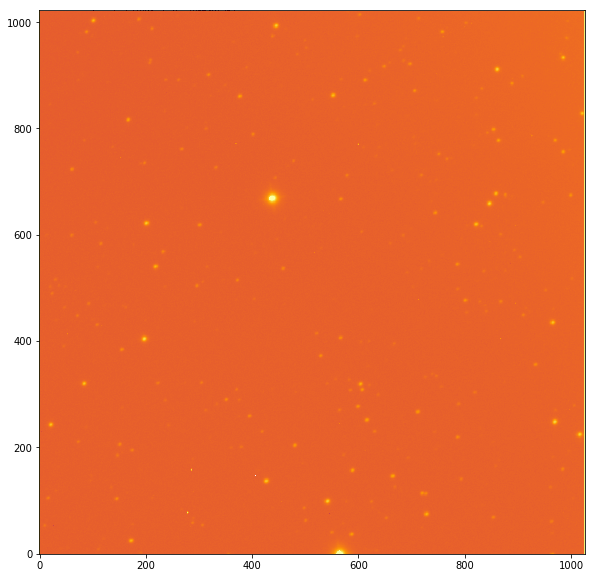

In [82]:
image_1 = fits.open("quadRU.fits")[0].data

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
ax.imshow(image_1, cmap=plt.cm.inferno, norm=LogNorm(), origin='lower');

In [83]:
x_values=[197.5,202,459,268.5,712.5,481,332.5,84.5,402.5,934]
y_values=[404.5,621.5,537,761.5,267,204,727,778.5,789.5,356]

positions = [x_values,y_values]

In [84]:
apertures = CircularAperture(positions, r=7)
phot_table = aperture_photometry(image_1, apertures, method='subpixel', subpixels=5)

for col in phot_table.colnames:phot_table[col].info.format = '%.8g'
print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1   197.5   404.5    456485.15
  2     202   621.5     249320.3
  3     459     537    57857.976
  4   268.5   761.5    51839.714
  5   712.5     267    80120.432
  6     481     204    82077.589
  7   332.5     727    50744.305
  8    84.5   778.5    40806.859
  9   402.5   789.5    59052.888
 10     934     356    68813.073


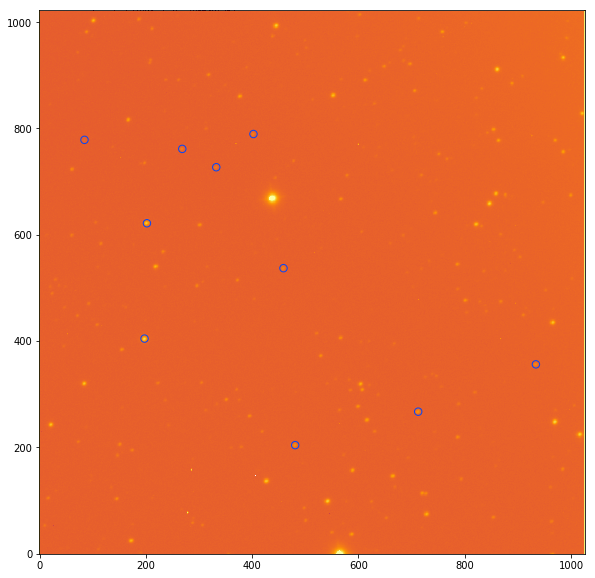

In [85]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

ax.imshow(image_1, cmap=plt.cm.inferno, norm=LogNorm(), origin='lower');
apertures.plot(color='#0547f9', lw=1)

In [86]:
annulus_apertures = CircularAnnulus(positions, r_in=15, r_out=20)

apers = [apertures, annulus_apertures]
phot_table_2 = aperture_photometry(image_1, apers, method='subpixel', subpixels=5)

for col in phot_table_2.colnames:phot_table_2[col].info.format = '%.8g'
print(phot_table_2)

 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1   197.5   404.5      456485.15      145516.45
  2     202   621.5       249320.3      141260.09
  3     459     537      57857.976      143914.93
  4   268.5   761.5      51839.714       136583.2
  5   712.5     267      80120.432      146666.72
  6     481     204      82077.589      145645.97
  7   332.5     727      50744.305      138795.82
  8    84.5   778.5      40806.859      132282.06
  9   402.5   789.5      59052.888      143345.51
 10     934     356      68813.073      159332.14


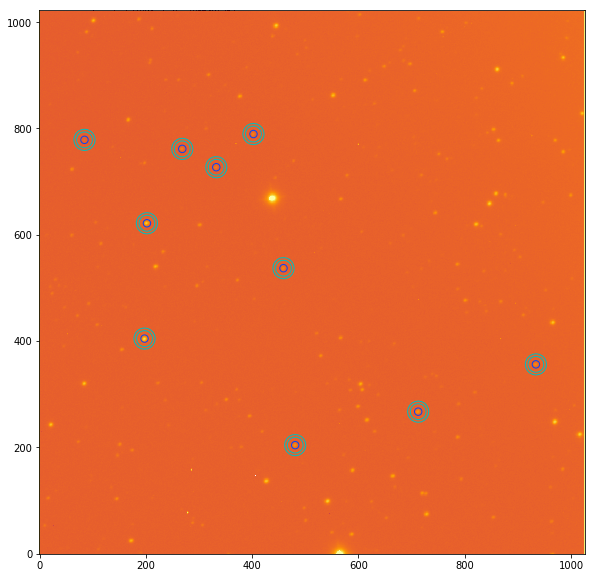

In [87]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

ax.imshow(image_1, cmap=plt.cm.inferno, norm=LogNorm(), origin='lower');
apertures.plot(color='#0547f9', lw=1)
annulus_apertures.plot(color='c', lw=1)

In [88]:
area_1=(7**2)*np.pi
area_2=(20**2-15**2)*np.pi

subtracted_values = phot_table_2['aperture_sum_0'] - ((phot_table_2['aperture_sum_1']/area_2)*area_1)
subtracted_values

415740.55
209767.47
17561.796
13596.417
39053.749
41296.718
11881.476
3767.8822
18916.144
24200.075


In [89]:
bkg_sigma = mad_std(image_1)
daofind = DAOStarFinder(fwhm=4., threshold=3*bkg_sigma)
sources = daofind(image_1)
for col in sources.colnames:sources[col].info.format ='%.8g'
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
--- --------- --------- ---------- ... --- --------- --------- ------------
  1 561.29745 1.0577631 0.31775389 ...   0 61405.583 1002.4752   -7.5026841
  2 1025.5081 1.5346946  0.4440497 ...   0 29365.191 547.13494   -6.8452361
  3 565.10978  4.110159 0.24449333 ...   0 60625.719 721.55518   -7.1456739
  4 633.88727 5.7229432 0.65108982 ...   0 421.10331 1.3825245  -0.35168206
  5 111.56587 8.8270582 0.36146805 ...   0 403.00637 1.5546735  -0.47909801
  6 172.86663 24.843851 0.39602069 ...   0 3875.4179 42.190782   -4.0630439
  7 587.59378 36.751537 0.43103539 ...   0 2162.5629 20.101052    -3.258047
  8 964.47372 39.078154 0.62842616 ...   0 395.74794 1.1032781  -0.10671251
  9 550.59563 40.522206 0.46177694 ...   0 757.52838 5.0092388   -1.7494293
 10 484.57191 42.495585 0.38002133 ...   0 344.40399  1.095106 -0.098640433
...       ...       ...        ... ... ...       ...       ...          ...
254 758.4063

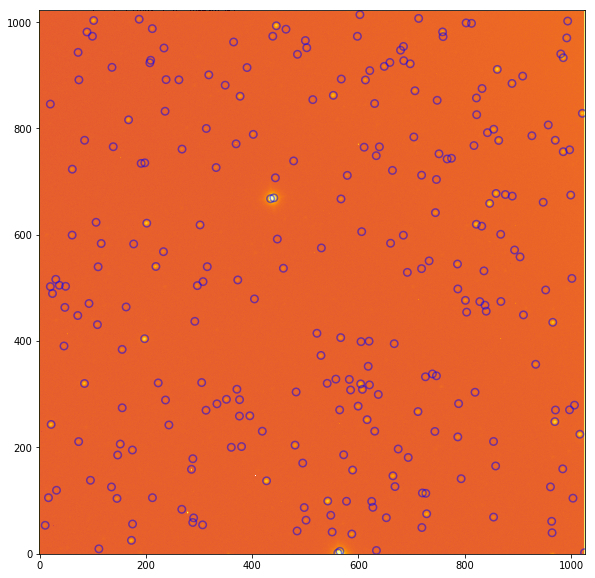

In [90]:
source_locations=[sources['xcentroid'], sources['ycentroid']]


finder_apertures = CircularAperture(source_locations, r=7)
source_table = aperture_photometry(image_1, apertures, method = 'subpixel', subpixels=5)


fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

ax.imshow(image_1, cmap=plt.cm.inferno, origin='lower', norm=LogNorm())
finder_apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [91]:
bias_1 = fits.open("bias.0006.fits")[0].data
bias_2 = fits.open("bias.0007.fits")[0].data
bias_3 = fits.open("bias.0008.fits")[0].data
bias_4 = fits.open("bias.0009.fits")[0].data
bias_5 = fits.open("bias.0010.fits")[0].data
bias_6 = fits.open("bias.0011.fits")[0].data
bias_7 = fits.open("bias.0012.fits")[0].data
bias_8 = fits.open("bias.0013.fits")[0].data
bias_9 = fits.open("bias.0014.fits")[0].data
bias_10 = fits.open("bias.0015.fits")[0].data
bias_11 = fits.open("bias.0016.fits")[0].data

mean=np.mean(bias_11)

master =(bias_1+bias_2+bias_3+bias_4+bias_5+bias_6+bias_7+bias_8+bias_9+bias_10+bias_11)/11
np.mean(master)

351.47656093552536